In [1]:
!pip install -q git+https://github.com/remykarem/pandas-lightning#egg=pandas-lightning

In [2]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import pandas_lightning
import matplotlib.pyplot as plt

from pandas_lightning import Pipeline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sns.set_theme()
sns.set(rc={'figure.figsize':(14.7,8.27)})

/kaggle/input/cs5228-2020-semester-2-final-project/train.csv
/kaggle/input/cs5228-2020-semester-2-final-project/example-submission.csv
/kaggle/input/cs5228-2020-semester-2-final-project/test.csv
/kaggle/input/cs5228-2020-semester-2-final-project/auxiliary-data/sg-commerical-centres.csv
/kaggle/input/cs5228-2020-semester-2-final-project/auxiliary-data/sg-gov-markets-hawker-centres.csv
/kaggle/input/cs5228-2020-semester-2-final-project/auxiliary-data/sg-train-stations.csv
/kaggle/input/cs5228-2020-semester-2-final-project/auxiliary-data/sg-population-demographics.csv
/kaggle/input/cs5228-2020-semester-2-final-project/auxiliary-data/sg-shopping-malls.csv
/kaggle/input/cs5228-2020-semester-2-final-project/auxiliary-data/sg-primary-schools.csv
/kaggle/input/cs5228-2020-semester-2-final-project/auxiliary-data/sg-secondary-schools.csv


In [3]:
df_ = pd.read_csv("../data/train.csv")

In [4]:
def get_average_storey(storey: pd.Series):
    a, b = storey.str.split(" to ").str
    avg_storey = (b.astype(int) + a.astype(int))/2
    return avg_storey.astype("float16")

In [5]:
df = df_.lambdas.astype(
    month="datetime",
    planning_area="category",
    flat_model="category",
    subzone="category",
    region="category",
    town="category",
    flat_type=['1 room', '2 room', '3 room', '4 room', '5 room', 'executive', 'multi generation']
    
).lambdas.sapply(
    storey=("storey_range", get_average_storey)
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


### Number of HDB resale flat transactions

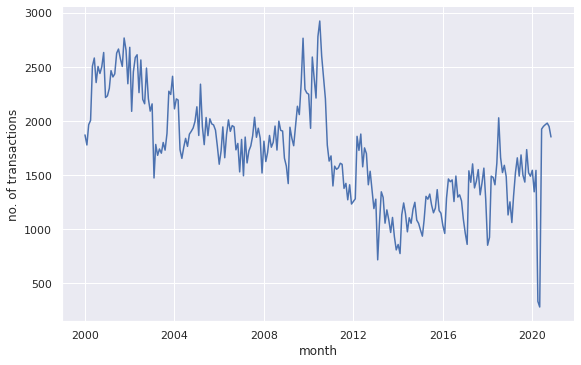

In [6]:
df_transactions = df.groupby("month")[["month"]].size().reset_index(name="no. of transactions")

df_transactions.quickplot(
    numerical=["no. of transactions", "month"]
).lineplot(aspect=1.6)

### Distributions of flat types in the last 3 years

2020

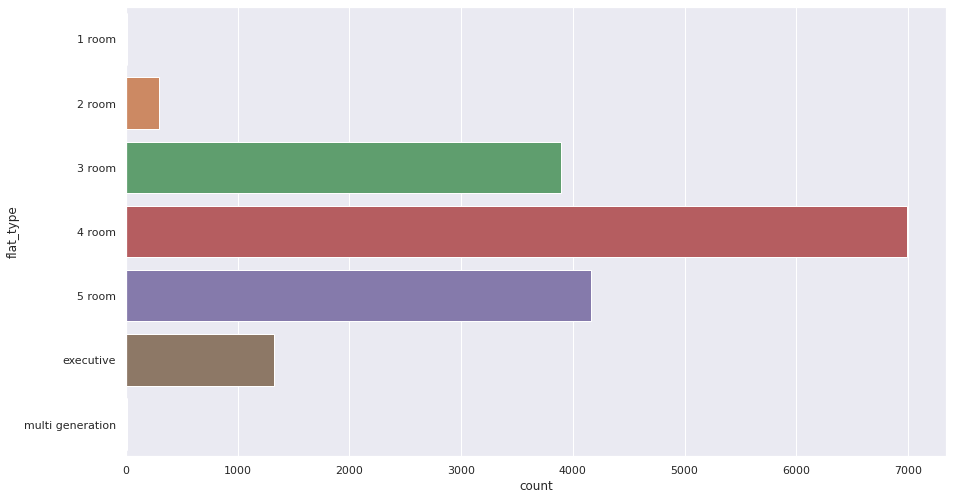

In [7]:
df.query("month >= 20200101").quickplot(
    categorical="flat_type"
).countplot()

2019

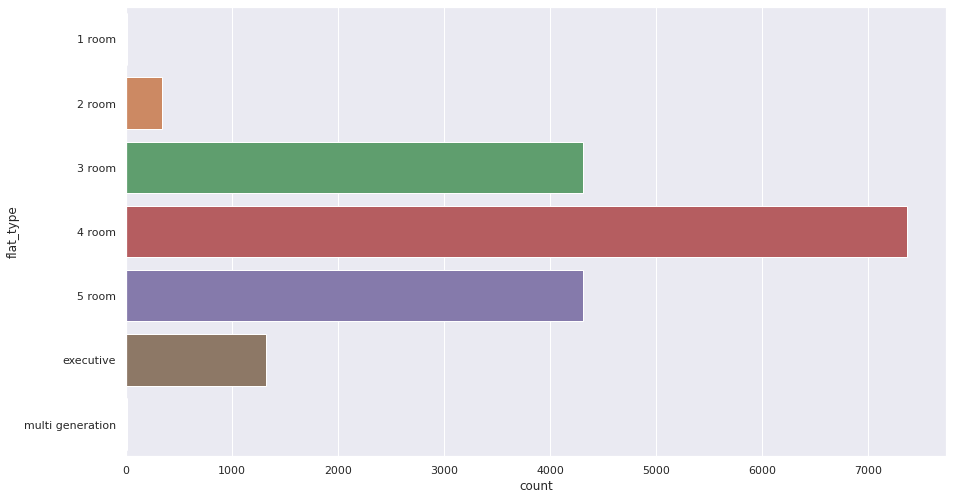

In [8]:
df.query("20190101 <= month < 20200101").quickplot(
    categorical="flat_type"
).countplot()

2018

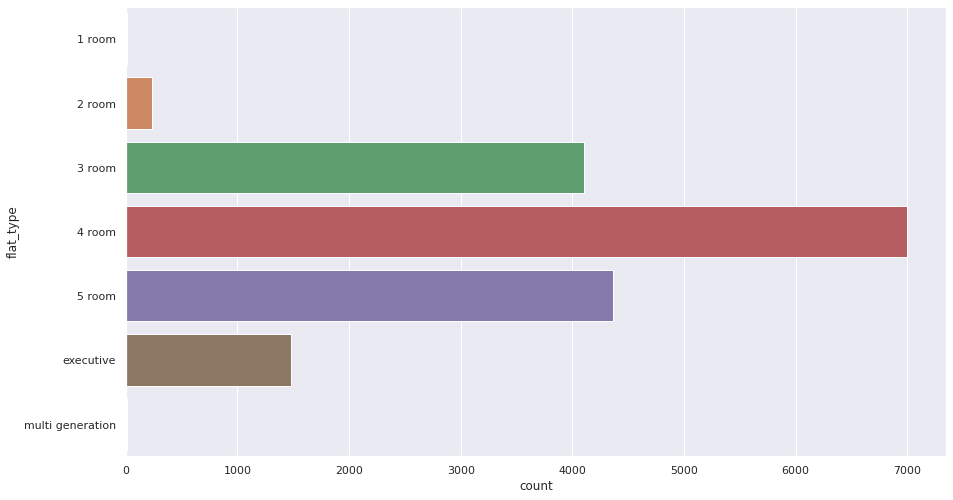

In [9]:
df.query("20180101 <= month < 20190101").quickplot(
    categorical="flat_type"
).countplot()

### Trend in resale prices

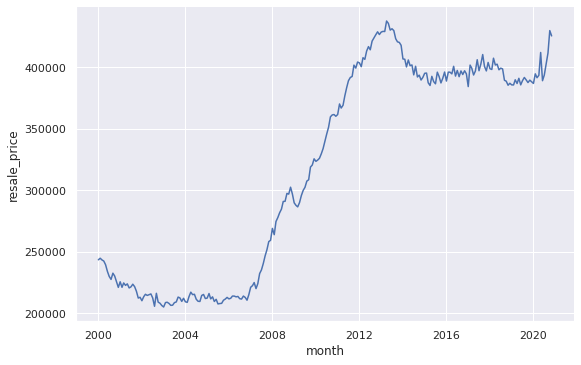

In [10]:
df.quickplot(
    numerical=["resale_price", "month"]
).lineplot(aspect=1.6)

### Trend in resale prices by flat type

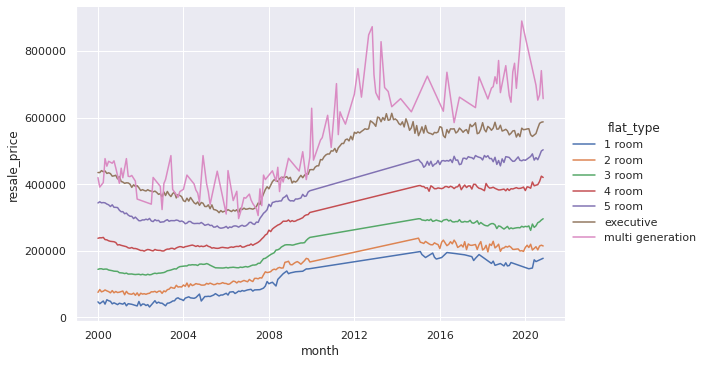

In [11]:
df.quickplot(
    numerical=["resale_price", "month"],
    categorical=["flat_type"]
).lineplot(aspect=1.6)

### Distribution of resale price for each flat type in the last 3 years

2020

/opt/conda/lib/python3.7/site-packages/pandas_lightning/dataframe_quickplot.py:134: UserWarning: The cardinality of the categorical variable is more than 3. This might cause visual clutter.
  warnings.warn("The cardinality of the categorical variable "


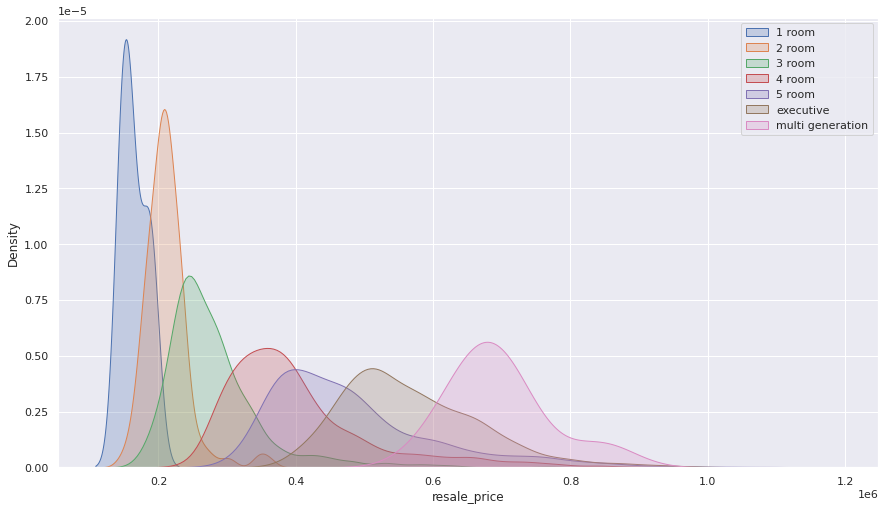

In [12]:
df.query("month >= 20200101").quickplot(
    numerical="resale_price",
    categorical="flat_type"
).kdeplot()

2019

/opt/conda/lib/python3.7/site-packages/pandas_lightning/dataframe_quickplot.py:134: UserWarning: The cardinality of the categorical variable is more than 3. This might cause visual clutter.
  warnings.warn("The cardinality of the categorical variable "


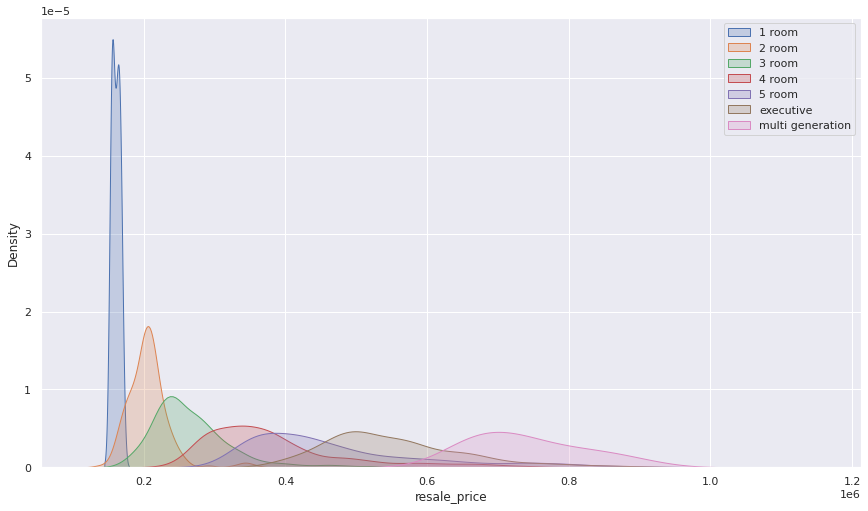

In [13]:
df.query("20190101 <= month < 20200101").quickplot(
    numerical="resale_price",
    categorical="flat_type"
).kdeplot()

2018

/opt/conda/lib/python3.7/site-packages/pandas_lightning/dataframe_quickplot.py:134: UserWarning: The cardinality of the categorical variable is more than 3. This might cause visual clutter.
  warnings.warn("The cardinality of the categorical variable "


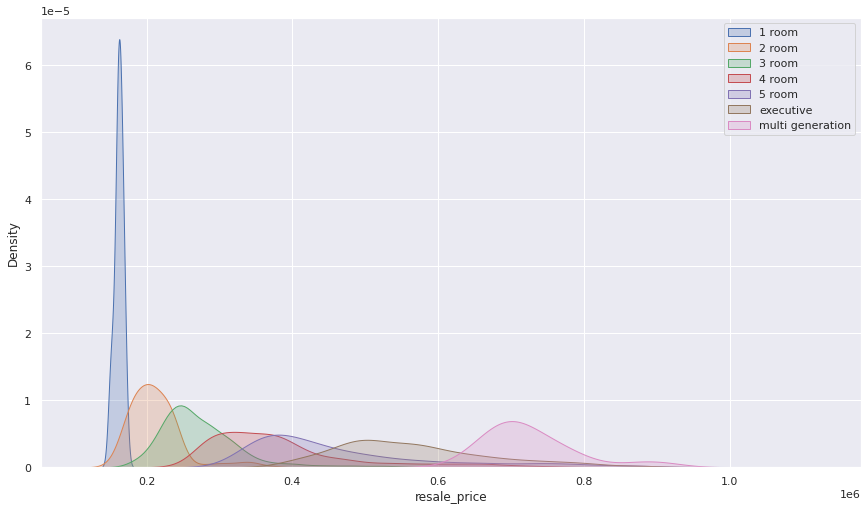

In [14]:
df.query("20180101 <= month < 20190101").quickplot(
    numerical="resale_price",
    categorical="flat_type"
).kdeplot()

### Univariate plots

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


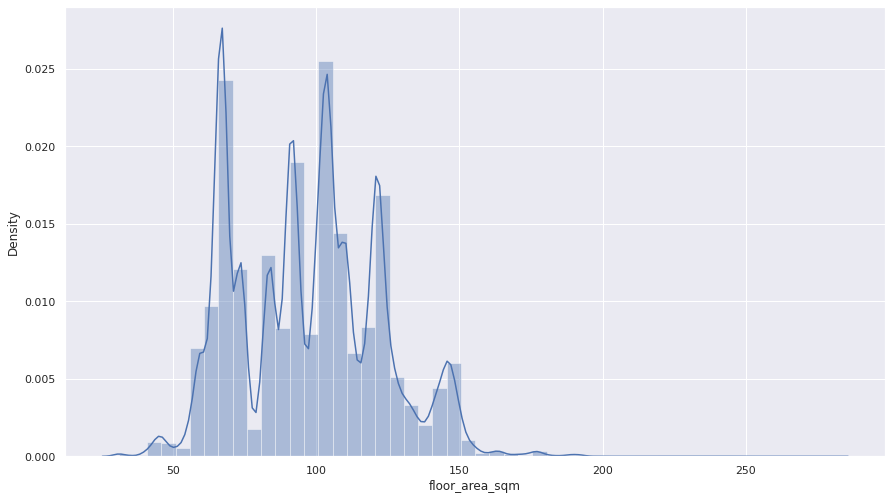

In [15]:
df.quickplot(
    numerical=["floor_area_sqm"]
).distplot()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


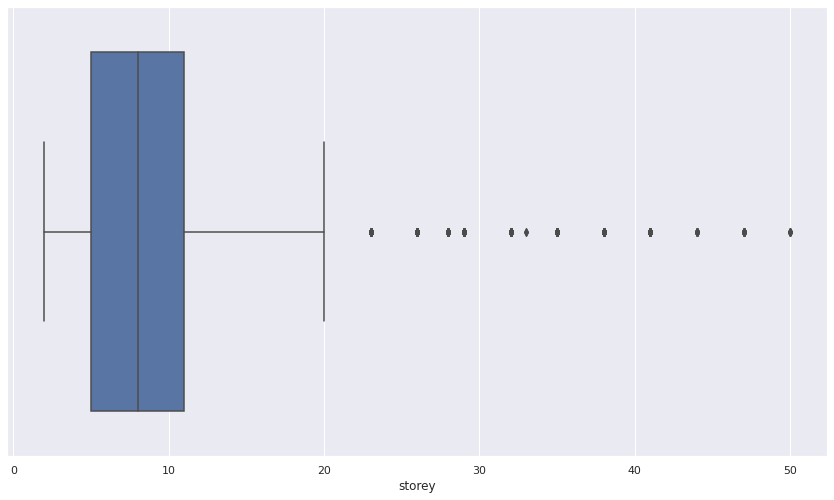

In [16]:
df.quickplot(
    numerical=["storey"]
).boxplot()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


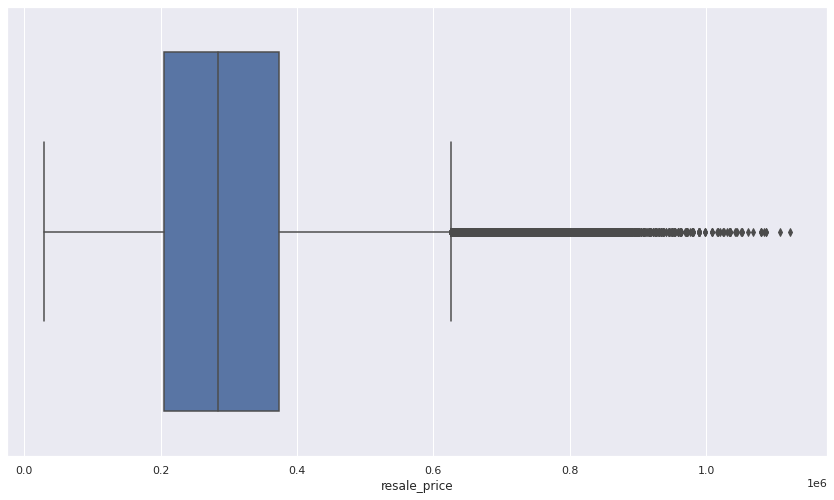

In [17]:
df.quickplot(
    numerical=["resale_price"]
).boxplot()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


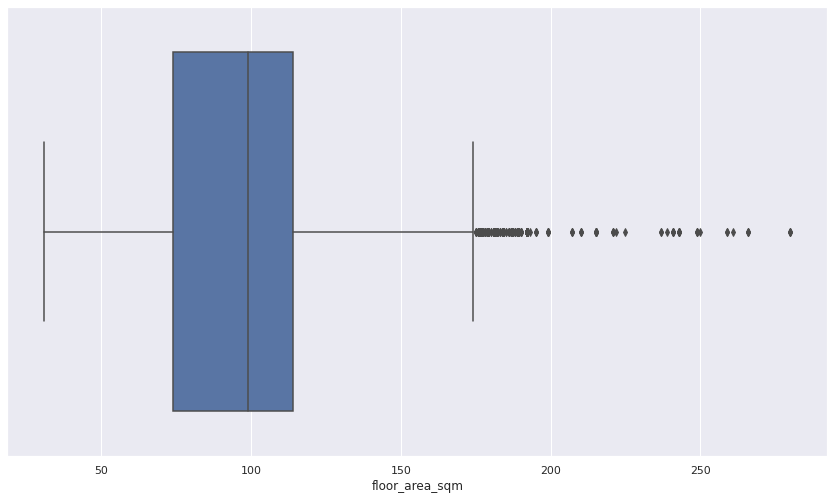

In [18]:
df.quickplot(
    numerical=["floor_area_sqm"]
).boxplot()

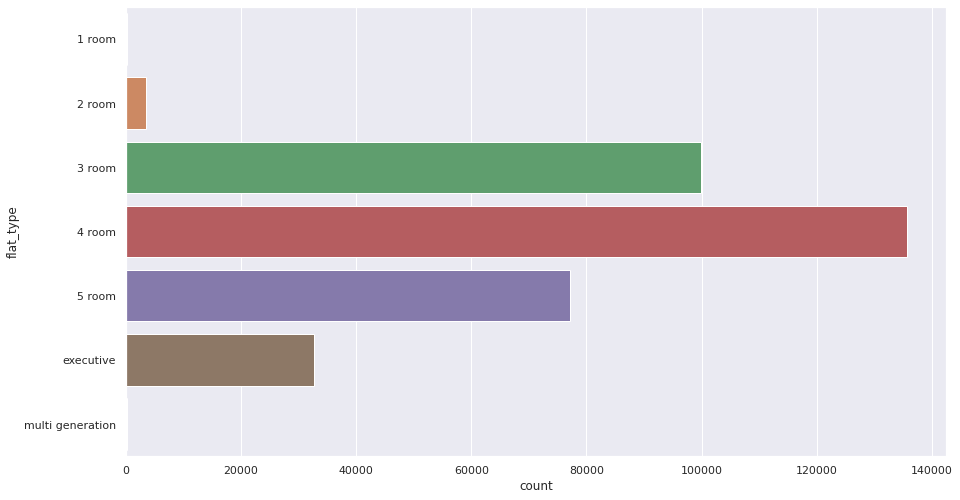

In [19]:
df.quickplot(
    categorical="flat_type"
).countplot()

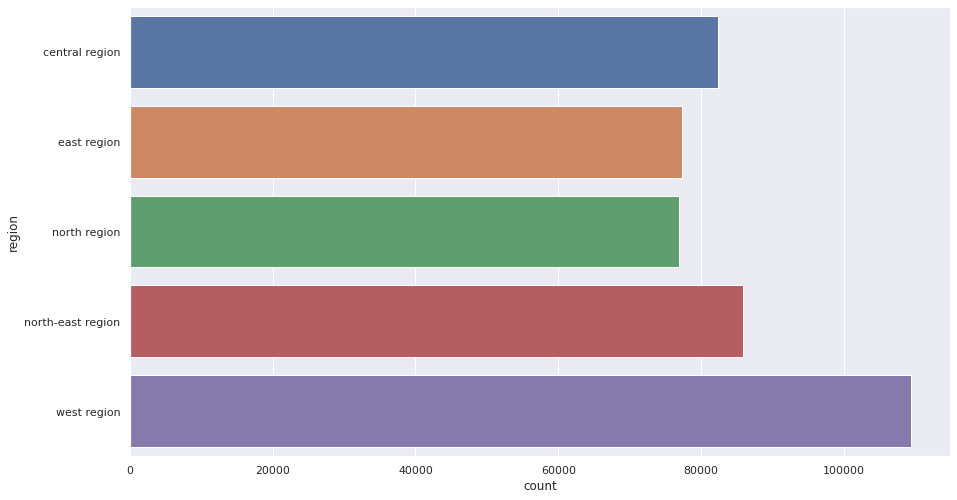

In [20]:
df.quickplot(
    categorical="region"
).countplot()

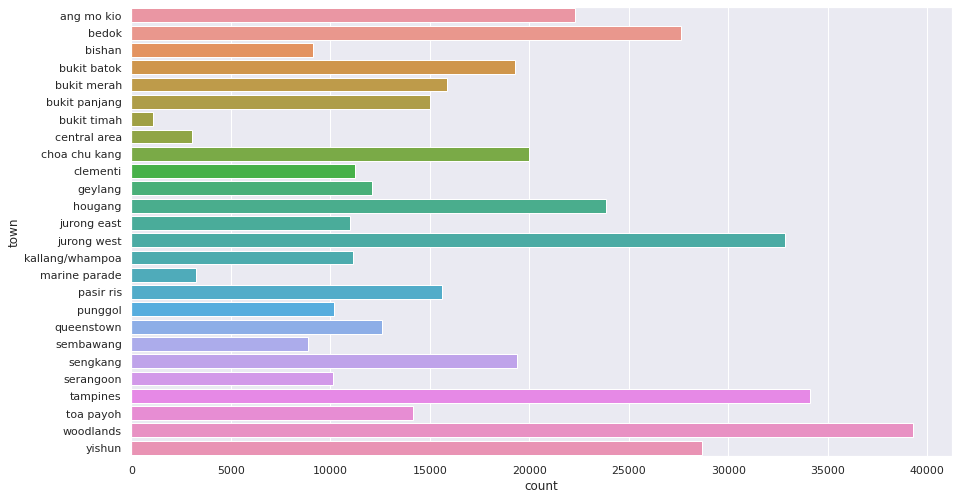

In [21]:
df.quickplot(
    categorical="town"
).countplot()

### Pairwise plots

#### Pearson's correlation for numerical features

<AxesSubplot:>

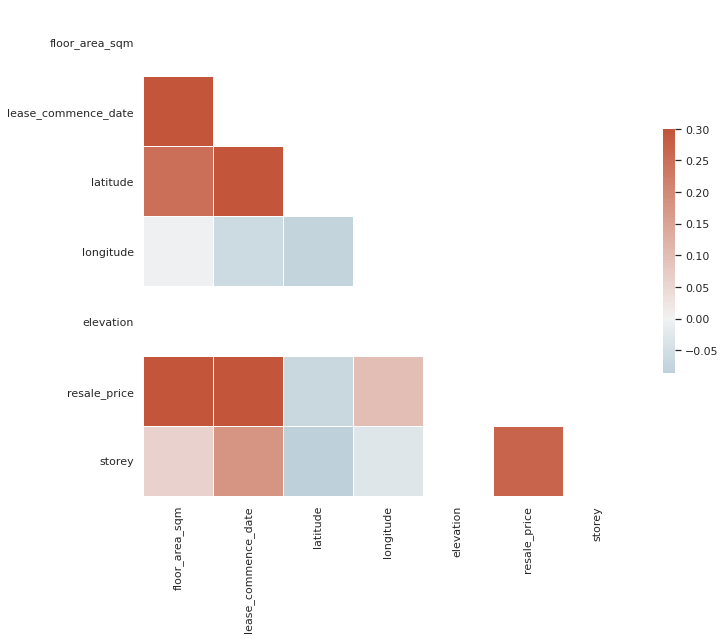

In [22]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
sns.set_theme()

#### Resale price vs. floor area

/opt/conda/lib/python3.7/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


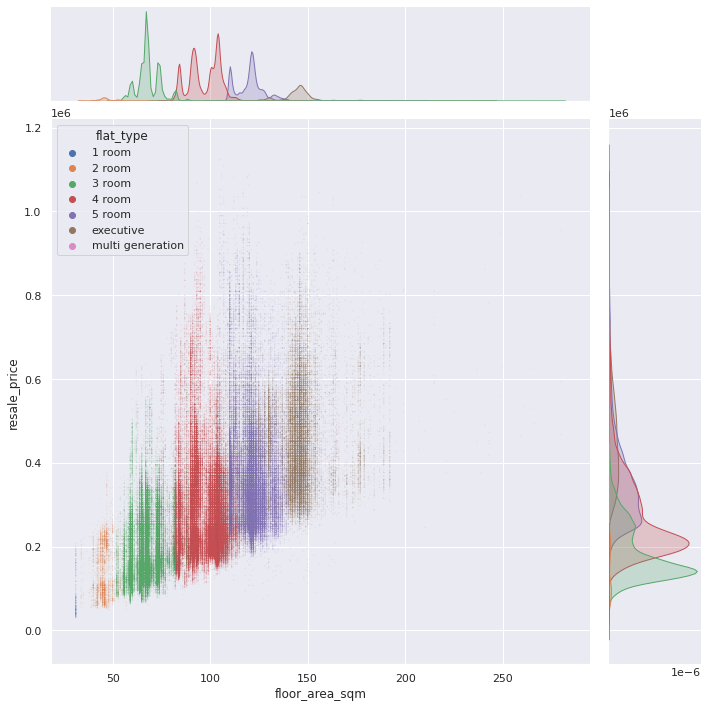

In [24]:
df.quickplot(
    numerical=["floor_area_sqm", "resale_price"],
).scatterplot(hue="flat_type", alpha=1, s=1, height=10, marker="+")

#### Pearson's correlation coefficient (absolute)

In [25]:
df.tests.numerical()

,feature_1,feature_2,absolute_corr_coeff
0,resale_price,floor_area_sqm,0.570385
1,lease_commence_date,floor_area_sqm,0.443134
2,latitude,lease_commence_date,0.430553
3,resale_price,lease_commence_date,0.423578
4,storey,resale_price,0.269431
5,latitude,floor_area_sqm,0.247825
6,storey,lease_commence_date,0.180075
7,resale_price,longitude,0.099786
8,storey,latitude,0.086430
9,longitude,latitude,0.075728


#### Cramers' V for categorical features

In [26]:
df.tests.get_cramersv()

Testing ['town', 'flat_type', 'flat_model', 'subzone', 'planning_area', 'region']


,col1,col2,coefficient
14,planning_area,region,0.999969
12,subzone,planning_area,0.999858
4,town,region,0.999857
2,town,subzone,0.999851
13,subzone,region,0.999826
3,town,planning_area,0.992651
5,flat_type,flat_model,0.664501
9,flat_model,subzone,0.344807
6,flat_type,subzone,0.340981
11,flat_model,region,0.257499
